In [1]:
!pip install osmium

In [4]:
import ogr
import shapely
from shapely.geometry import *
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
driver=ogr.GetDriverByName('OSM')
data = driver.Open('bangladesh-latest.osm.pbf')
layer = data.GetLayer('points')

features=[x for x in layer]
print(len(features))

186098


In [6]:
data_list=[]
for feature in features:
    data=feature.ExportToJson(as_object=True)
    coords=data['geometry']['coordinates']
    shapely_geo=Point(coords[0],coords[1])
    name=data['properties']['name']
    highway=data['properties']['highway']
    other_tags=data['properties']['other_tags']
    if other_tags and 'amenity' in other_tags:
        feat=[x for x in other_tags.split(',') if 'amenity' in x][0]
        amenity=feat[feat.rfind('>')+2:feat.rfind('"')]
    else:
        amenity=None
    data_list.append([name,highway,amenity,shapely_geo])
gdf=gpd.GeoDataFrame(data_list,columns=['Name','Highway','Amenity','geometry'],crs={'init': 'epsg:4326'}).to_crs(epsg=3310)

In [14]:
import matplotlib.pyplot as plt

In [20]:
gdf.shape
gdf

,Name,Highway,Amenity,geometry
0,দৈনিক বাংলা মোড়,None,None,POINT (-9886457.665 8381526.711)
1,None,traffic_signals,None,POINT (-9879157.666 8380588.553)
2,None,traffic_signals,None,POINT (-9879461.914 8381565.158)
3,None,traffic_signals,None,POINT (-9879493.966 8382939.097)
4,None,motorway_junction,None,POINT (-9876875.950 8381474.580)
...,...,...,...,...
186093,Musa Pharmacy,None,pharmacy,POINT (-10031207.838 8233173.954)
186094,Al Nur Pharmacy,None,pharmacy,POINT (-10031206.568 8233411.151)
186095,Fayezia Medico,None,pharmacy,POINT (-10031258.761 8233436.716)
186096,Ehista Business Ceter,None,None,POINT (-10031306.730 8233426.866)


In [21]:
cafe_bar=gdf[gdf.Amenity.isin(['cafe','pub','bar'])]
cafe_bar.shape

(400, 4)

In [23]:
cafe_bar

,Name,Highway,Amenity,geometry
162,German Club - Rest House Society,None,pub,POINT (-9879610.023 8380991.873)
163,American Club - AEEA,None,pub,POINT (-9878634.031 8381975.586)
164,Netherland Recreation Center (Dutch Club),None,pub,POINT (-9878576.472 8381594.080)
4778,British High Commission Club,None,pub,POINT (-9878992.742 8380987.033)
4796,Australian Club,None,pub,POINT (-9878892.768 8381665.925)
...,...,...,...,...
185362,None,None,cafe,POINT (-9885559.975 8385356.598)
185889,The White Canary Cafe,None,cafe,POINT (-9879359.981 8381259.002)
185941,Community Cafe,None,cafe,POINT (-9856820.360 8381219.779)
185942,Local Cafe Dhaka,None,cafe,POINT (-9857430.381 8384672.144)


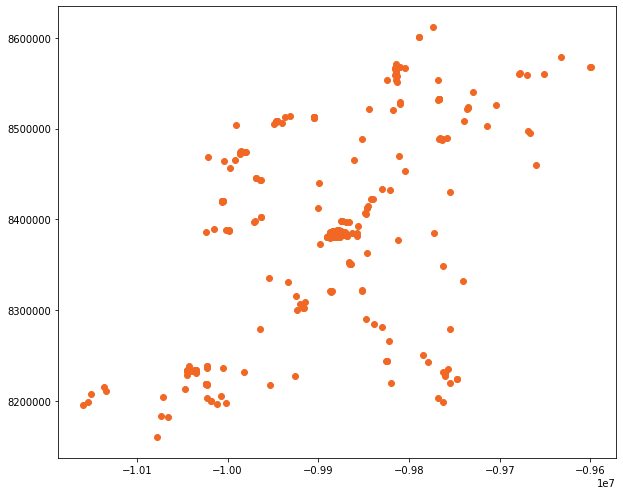

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
for i,row in cafe_bar.iterrows():
    x=row['geometry'].x
    y=row['geometry'].y
    #plt.annotate(row['Name'], xy=(x,y), size=13, xytext=(0,5), textcoords='offset points')
    plt.plot(x,y,'o', color='#f16824')
    ax.set(aspect=1)